# Chapter 2. Python Advanced: 

## 1. 이터레이터와 제너레이터

- 아래 그림은 이터레이터와 제너레이터의 관계를 잘 보여준다.

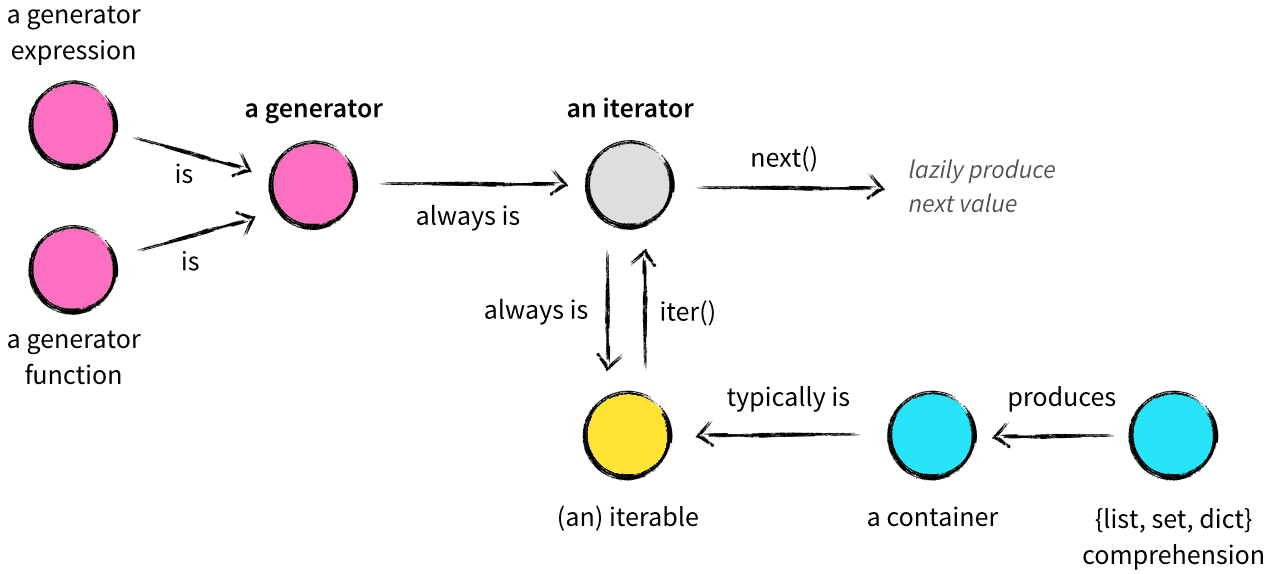

### 1.1 컨테이너 (Container)
- 여러개의 원소들로 이루어진 데이터 구조 <br>
- 파이썬에는 list, set, dict, tuple, str 등이 있음<br>
- 그림에서 보듯 comprehension이나 append 등의 방법을 이용하면 컨테이너를 만드는 것이 가능<br>
- 그리고 이러한 컨테이너는 보통 iterable 하다. 이는 for 문 등과 결합하여 자신이 가진 원소들을 하나씩 차례로 반환할 수 있음을 의미한다.

In [1]:
alpha = ['a', 'b', 'c', 'd', 'e']
for ch in alpha:
    print(ch)

a
b
c
d
e


### 1.2 이터레이터(Iterator)
iterator는 설명한 바와 같이 next()를 이용하여 다음 값을 반환한다. 위 그림과 같이 컨테이너는 iter()를 이용하여 이터레이터 객체로 변환할 수 있다.

In [2]:
iter1 = iter(alpha)
print(next(iter1))
print(next(iter1))
print(next(iter1))
print(next(iter1))
print(next(iter1))
print(next(iter1))

a
b
c
d
e


StopIteration: 

- 위 예를 보면 alpha에 다섯개의 값이 있기 때문에 next()가 다섯번 호출될때까지는 값이 제대로 반환되지만 여섯번째에는 더 이상 반환할 값이 없어 에러가 나는 것을 볼 수 있다.
- 이 때 반드시 컨테이너만 iterable한 것은 아니다. 어떤 형태이든 다음에 반환할 값을 생성해 낼 수 있다면 iterable하다고 할 수 있다. 이것이 iterator이다. 예를 들어 itertools의 모든 함수는 이터레이터를 반환한다. 

In [3]:
from itertools import count
counter = count(start=13)
print(next(counter))
print(next(counter))

13
14


In [4]:
from itertools import cycle
colors = cycle(['red', 'white', 'blue'])  # 무한
for i in range(10):
    print(next(colors))    

red
white
blue
red
white
blue
red
white
blue
red


In [5]:
from itertools import islice
slicedColors = islice(colors, 0, 4) #islice는 colors iterator에서 0부터 3까지 next()를 실행시킨 값을 가져옴
#즉, colors는 무한히 반복되지만 islice를 위와 같이 사용하면 네 개의 유한한 iterator를 만들 수 있음
for i in range(5):
    print(next(slicedColors))   

white
blue
red
white


StopIteration: 

아래 예는 피보나치 수열을 iterator 클래스로 구현한 예

In [6]:
class fib:
    def __init__(self):
        self.prev = 0 #첫 수를 초기화
        self.curr = 1 #둘째 수를 초기화

    def __iter__(self):
        return self

    def __next__(self):
        value = self.curr #둘째 수를 임시 저장
        self.curr += self.prev #첫 수와 둘째 수를 더해서 새로운 수를 계산
        self.prev = value #임시 저장한 둘째 수를 첫 수로 저장
        return value #새로운 수를 반환
    
f = fib() #객체 생성
#list(islice(f, 0, 10))
for i in range(10):
    print(next(f)) #10회에 걸쳐 next() 호출

1
1
2
3
5
8
13
21
34
55


### 1.3 제너레이터(Generater) 함수

제너레이터 함수는 yield 문을 이용해 한번에 하나의 결과만 반환. 

1. yield는 함수의 실행을 정지하고 산출된 값을 반환, 
2. 다음 호출될 때에 정지된 곳에서 다시 시작, 
3. 이를 위해 상태 정보를 유지

제너레이터 표현식은 리스트 컴프리헨션과 비슷하지만 결과로 리스트 대신 요청 시에만 결과를 생성

In [7]:
# generator의 예
# 주어진 값에 대해, 0부터 주어진 값까지 1씩 증가하면서 제곰값을 반환
# 즉 n이 5라면 0, 1, 4, 9, 16 을 순서대로 반환
def squares(n):
    for i in range(n):
        yield i*i
        
print(squares(3)) #결과가 어떻게 나올까?

<generator object squares at 0x00000179A55FE120>


위 예에서 **squares(3)**은 제너레이터 객체를 생성하고 객체를 반환, 즉 실제로 함수내용이 실행되는 것이 아님 <br>
실제로 실행하려면? 생성된 제너레이터 객체에 대해 **next()**함수를 호출

In [8]:
x = squares(3)
print(next(x))

0


위 예에서 0, 1, 4가 모두 출력되지 않고 0만 출력된 것에 주목 <br>
만약 **next()** 함수를 또 호출하다면 어떻게 될까?

In [9]:
print(next(x))
print(next(x))
print(next(x))

1
4


StopIteration: 

위 예에서 4까지 정상적으로 출력되고 그 이후에는 에러가 나는 것을 볼 수 있음 <br>
즉, generator는 그 자체로 한번의 반복 탐색을 지원하는 iterator이므로 한 차례만 반복 호출이 가능

for문과 결합한 예

In [10]:
for i in squares(5):
    print(i)

0
1
4
9
16


**yield**가 아닌 **return**을 이용해 전체 리스트를 한번에 반환하면 어떻게 될까?

In [11]:
def squares2(n):
    return [i*i for i in range(n)]

for i in squares2(5):
    print(i)

0
1
4
9
16


- 결과가 동일한데, 왜 굳이 yield를 이용한 generator를 쓸까? <br>
- 그것은 메모리 사용을 효율적으로 하기 위해서: 즉 리스트를 반환하면 한번에 리스트 전체를 만들어서 메모리를 사용하게 되지만, 
- generator는 리스트 전체가 아니라 호출 시에 필요한 값만 생성해서 반환, 또한 리스트 생성에 많은 계산이 필요한 경우, 소요시간을 분산할 수 있음

제너레이터 표현식: list comprehension과 유사하지만 [] 대신 ()를 사용

In [12]:
[x*x for x in range(4)]

[0, 1, 4, 9]

In [13]:
(x*x for x in range(4))

<generator object <genexpr> at 0x00000179A56269E0>

In [14]:
G = (x*x for x in range(4))

for i in G:
    print(i)

0
1
4
9


마지막으로 앞서 만든 피보나치 클래스를 제너레이터 함수로 구현한 예

In [15]:
def fib():
    prev, curr = 0, 1
    while True:
        yield curr
        prev, curr = curr, prev + curr

f = fib()
for i in range(10):
    print(next(f))

1
1
2
3
5
8
13
21
34
55


## 2. lambda, map, filter, reduce

### 2.1 lambda 함수
- 익명함수 : 메모리를 아끼고 가독성을 향상시킨다. pythonic
- 일반적인 함수는 객체를 만들고, 재사용을 위해 함수 이름(메모리)를 할당한다.

### lambda는 왜 쓰는가?
- 익명함수이기 때문에 한번 쓰이고 다음줄로 넘어가면 힙(heap) 메모리 영역에서 증발
- (참고) 가비지 컬렉터 (참조하는 객체가 없으면 지워버린다)
- 파이썬에서는 모든것이 객체로 관리 되고 각 객체들은 레퍼런스 카운터를 갖게 된다. 이 카운터가 0 즉, 그 누구도 참조하지 않게 된다면 메모리를 환원 하게 된다.

In [1]:
sum = lambda a, b: a + b
print(sum(3,4))

7


### 2.2 map 함수
- 내장함수로 입력받은 자료형의 각 요소가 합수에 의해 수행된 결과를 묶어서 map iterator 객체로 리턴
- 문법: map(f, iterable)
- 함수(f)와 반복 가능한 (iterable) 자료형을 입력으로 받는다.
- map으로 짜면 게으른 연산을 진행해서 메모리를 크게 절약할 수 있다.
- map의 연산 결과는 map iterator 객체로 리턴한다.

In [4]:

li = [1, 2, 3]
# 원하는 출력 : [1, 4, 9], li의 각 값을 제곱한 값으로 이루어진 리스트

result = list(map(lambda i: i ** 2 , li))
print(result)
# 아래 list comprehension과 무엇이 다를까?
print([x*x for x in li])

[1, 4, 9]
[1, 4, 9]


- 게으른 연산: 필요할 때 가져다 쓴다.
- iterator 참조

In [6]:
# ex1.
li = [1, 2, 3]
result = map(lambda i: i * i, li)
print(next(result)) # 1
print(next(result)) # 4
print(next(result)) # 9
print(next(result)) # StopIteration 발생

1
4
9


StopIteration: 

In [7]:
# ex2.
x = [1,2,3]
print(type(x)) # <class 'list'>
y = iter(x)
print(type(y)) # <class 'list_iterator'>

<class 'list'>
<class 'list_iterator'>


### 3항 연산자의 활용
- if else문
```
def func(a):
    if a > 10:
        return 'a가 10보다 크다'
    else:
        return 'a가 10보다 작다'
```

- 3항 연산자
```
def func2(a):
    return 'a가 10보다 크다' if a > 10 else 'a가 10보다 작다'
```

In [ ]:
#Input : li = [-3, -2, 0, 6, 8]
#Output : ['음수', '음수', 0, '양수', '양수']

#풀이 1
>>> ['양수' if i > 0 else ('음수' if i < 0 else 0)  for i in li]
>>> ['음수', '음수', 0, '양수', '양수']

#풀이 2
>>> list(map(lambda i: '양수' if i > 0 else ('음수' if i < 0 else 0), li))
>>> ['음수', '음수', 0, '양수', '양수']

### 2.3 filter 함수
filter(함수, literable)
- 두번째 인수인 반복 가능한 자료형 요소들을 첫번째 인자 함수에 하나씩 입력하여 리턴값이 참인 것만 묶어서 돌려준다.
- 함수의 리턴 값은 참이나 거짓이어야 한다.


In [9]:
li = [-2, -3, 5, 6]
# 양수만 반환하는 리스트
def ft(li):
    result = []
    for e in li:
        if e > 0:
            result.append(e)
        else:
            pass
    return result

print(ft(li))

[5, 6]


In [10]:
# filter 함수 사용시
def positive(x):
  return x > 0

print(list(filter(positive, li)))

[5, 6]


In [11]:
# filter + lambda 함수 사용시
list(filter(lambda x: x > 0, li))

[5, 6]

### 2.4 reduce 함수
- python3 부터 내장함수에서 빠짐
- reduce(function, iterable[, initializer])

In [13]:
#문서
from functools import reduce
print(reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])) # = ((((1+2)+3)+4)+5)

15


In [14]:
from functools import reduce
# 최대값 구하기
def maximum(li):
    default = 0
    for e in li:
        if default < e:
            default = e
    return default
maximum(li)

6

In [15]:
# reduce 이용 최대값 구하기
reduce(lambda a,b: a if a > b else b ,li)

6